# Time series data exercises

In [1]:
#Disable autosave
%autosave 0

Autosave disabled


In [2]:
#Import dependencies
import pandas as pd
import numpy as np
from vega_datasets import data

In [3]:
#Read in san francisco data
temp_df = data.sf_temps()

In [4]:
#Check out the dataframe
temp_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
#Check the datatype in the date column
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
#Set the date as the index
temp_df.set_index('date', inplace=True)

# sf_temps dataset

## Question 1

Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

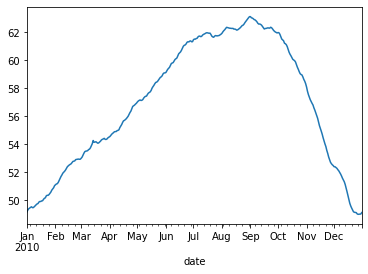

In [7]:
#Resample by day and plot the average temperature
temp_df.resample('D').temp.mean().plot()

## Question 2

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

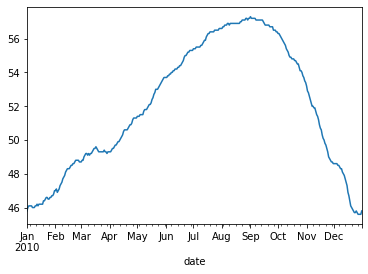

In [8]:
#Resample by day and plot the minimum temperature
temp_df.resample('D').temp.min().plot()

## Question 3

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

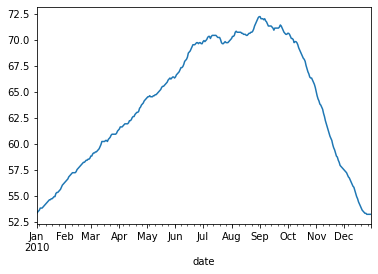

In [9]:
#Resample by day and plot the maximum temperature
temp_df.resample('D').temp.max().plot()

## Questions 4 & 5

Which month is the coldest, on average?

Which month has the highest average temperature?

In [10]:
#Resample by month and look at the average temperature
temp_df.resample('M').temp.mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

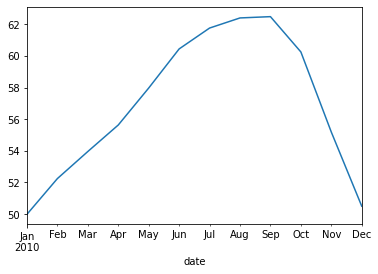

In [11]:
#Plot the average temperature by month
temp_df.resample('M').temp.mean().plot()

In [12]:
#Alternative method to determine the minimum
temp_df.resample('M').temp.mean().idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

In [13]:
#Same method applied to determine the maximum
temp_df.resample('M').temp.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

## Question 6

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [14]:
#Take the aggregate min and max for daily temperature
minmax_df = temp_df.resample('D').temp.agg(['min', 'max'])

In [15]:
#Calculate the change
minmax_df['change'] = minmax_df['max'] - minmax_df['min']
minmax_df.head()

,min,max,change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [16]:
#Look at the average daily change for each month
minmax_df.resample('M').change.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change, dtype: float64

In [17]:
#Method to retrieve the specific month
minmax_df.resample('M').change.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

# seattle_weather dataset

## Question 1

Which year and month combination has the highest amount of precipitation?

In [18]:
#Read in the seattle weather data
seattle_df = data.seattle_weather()
seattle_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
#Check if the date column is in datetime format
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [20]:
#Set the date as the index
seattle_df.set_index('date', inplace=True)
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
#Resample by month and sum the precipitation
seattle_df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [22]:
#What is the maximum amount of precipitation?
seattle_df.resample('M').precipitation.sum().max()

284.5

In [23]:
#Take the index of the maximum value to find the month/year combination
seattle_df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [24]:
#Use strftime to make the information easier to read
seattle_df.resample('M').precipitation.sum().idxmax().strftime('%B, %Y')

'December, 2015'

## Question 2

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

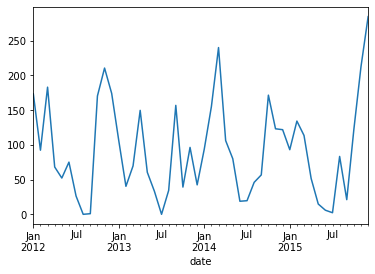

In [25]:
#Plot the monthly precipitation
seattle_df.resample('M').precipitation.sum().plot()

## Question 3

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

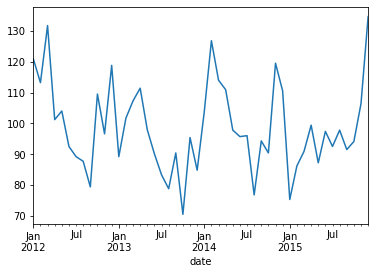

In [26]:
#Amount of wind per month
seattle_df.resample('M').wind.sum().plot()

## Question 4

Which year-month combination is the windiest?

In [27]:
#Resample data by month
seattle_df.resample('M').wind.sum()

date
2012-01-31    120.9
2012-02-29    113.2
2012-03-31    131.7
2012-04-30    101.2
2012-05-31    104.0
2012-06-30     92.5
2012-07-31     89.2
2012-08-31     87.7
2012-09-30     79.4
2012-10-31    109.5
2012-11-30     96.6
2012-12-31    118.8
2013-01-31     89.2
2013-02-28    101.7
2013-03-31    107.3
2013-04-30    111.4
2013-05-31     97.9
2013-06-30     90.1
2013-07-31     83.3
2013-08-31     78.8
2013-09-30     90.4
2013-10-31     70.5
2013-11-30     95.4
2013-12-31     84.8
2014-01-31    103.8
2014-02-28    126.8
2014-03-31    114.0
2014-04-30    110.9
2014-05-31     97.8
2014-06-30     95.7
2014-07-31     96.0
2014-08-31     76.8
2014-09-30     94.3
2014-10-31     90.4
2014-11-30    119.5
2014-12-31    110.5
2015-01-31     75.3
2015-02-28     86.2
2015-03-31     90.9
2015-04-30     99.4
2015-05-31     87.2
2015-06-30     97.4
2015-07-31     92.5
2015-08-31     97.8
2015-09-30     91.5
2015-10-31     94.1
2015-11-30    106.4
2015-12-31    134.6
Freq: M, Name: wind, dtype: float64

In [28]:
#Use idxmax to get the year/month combination
seattle_df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [29]:
#Use strftime to extract the relevant information
seattle_df.resample('M').wind.sum().idxmax().strftime('%B, %Y')

'December, 2015'

## Question 5

What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [30]:
#What values are in my weather column?
seattle_df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [31]:
#Resample by year and take the value counts of weather
seattle_df.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

## Question 6

In which month does it rain the most?

In [32]:
#Resample by month and sum the precipitation
seattle_df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [33]:
#Create a dataframe of this resampling
rain_by_month = pd.DataFrame(seattle_df.resample('M').precipitation.sum())
rain_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [34]:
#Create a new column containing the month
rain_by_month['month'] = rain_by_month.index.strftime('%B')

In [35]:
#Verify my new column exists
rain_by_month.head()

,precipitation,month
date,,
2012-01-31,173.3,January
2012-02-29,92.3,February
2012-03-31,183.0,March
2012-04-30,68.1,April
2012-05-31,52.2,May


In [36]:
#Group by the month and take the average precipitation
rain_by_month.groupby('month').precipitation.mean()

month
April         93.850
August        40.925
December     155.675
February     105.500
January      116.500
July          12.050
June          33.225
March        151.550
May           51.875
November     160.625
October      125.850
September     58.875
Name: precipitation, dtype: float64

In [37]:
#Use idxmax to get the month
rain_by_month.groupby('month').precipitation.sum().idxmax()

'November'

## Question 7

Which month has the most number of days with a non-zero amount of precipitation?

In [38]:
#Create a new column that records whether or not it rained at all
seattle_df['did_rain'] = np.where(seattle_df['precipitation'] == 0, 0, 1)
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [39]:
#Resample by month
seattle_df.resample('M').did_rain.sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: did_rain, dtype: int64

In [40]:
#Resample by month, look at the sum of did_rain, and extract the month and year
seattle_df.resample('M').did_rain.sum().idxmax().strftime('%B, %Y')

'December, 2012'

In [41]:
#Create a new df of the data resampled by month
did_rain_df = pd.DataFrame(seattle_df.resample('M').did_rain.sum())
did_rain_df.head()

,did_rain
date,
2012-01-31,22
2012-02-29,19
2012-03-31,22
2012-04-30,17
2012-05-31,10


In [42]:
#Create a month column
did_rain_df['month'] = did_rain_df.index.strftime('%B')
did_rain_df.head()

,did_rain,month
date,,
2012-01-31,22,January
2012-02-29,19,February
2012-03-31,22,March
2012-04-30,17,April
2012-05-31,10,May


In [43]:
#Group by month to find the rainiest month
did_rain_df.groupby('month').did_rain.sum()

month
April        59
August       22
December     81
February     73
January      66
July         11
June         37
March        73
May          34
November     71
October      61
September    35
Name: did_rain, dtype: int64

In [44]:
#Use idxmax to return the month
did_rain_df.groupby('month').did_rain.sum().idxmax()

'December'

# flights_20k dataset

## Question 1

Convert any negative delays to 0.

In [45]:
#Read in the flights dataset
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [46]:
#Correct all negative delays to 0
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


## Question 2

Which hour of the day has the highest average delay?

In [47]:
#Make the date my index
flights.set_index('date', inplace=True)
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [48]:
#Create an hour column
flights['hour'] = flights.index.strftime('%H')
flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [49]:
#Group by hour to find the hour with the greatest average delay
flights.groupby('hour').delay.mean()

hour
00    127.916667
01    170.000000
03    302.500000
05      0.513514
06      2.494856
07      3.071932
08      4.030483
09      5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [50]:
#Use idxmax to return the hour
flights.groupby('hour').delay.mean().idxmax()

'03'

## Question 3

Does the day of the week make a difference in the delay amount?

In [51]:
#Create a new column for the day of the week
flights['day_of_week'] = flights.index.strftime('%A')
flights.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [52]:
#Group by day of the week and take the mean of delay
flights.groupby('day_of_week').delay.mean()

day_of_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

## Question 4

Does the month make a difference in the delay amount?

In [53]:
#Create a new column of the month
flights['month'] = flights.index.strftime('%B')
flights.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [54]:
#Group by month and take the average delay
flights.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64